In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load SVHN dataset
train_data, test_data = tfds.load('horses_or_humans', split=['train', 'test'], as_supervised=True)

# Get information about the dataset
num_classes = 2  
num_train_examples = tf.data.experimental.cardinality(train_data).numpy()
num_test_examples = tf.data.experimental.cardinality(test_data).numpy()

In [3]:
print("Number of classes:", num_classes)
print("Number of training examples:", num_train_examples)
print("Number of test examples:", num_test_examples)

Number of classes: 2
Number of training examples: 1027
Number of test examples: 256


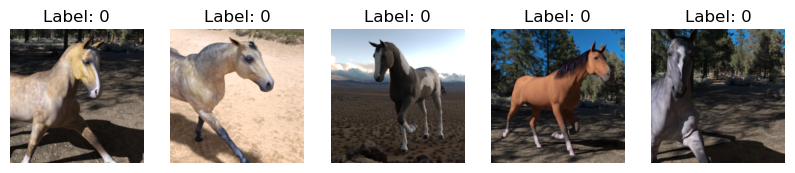

In [4]:
# Display sample images
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(train_data.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()

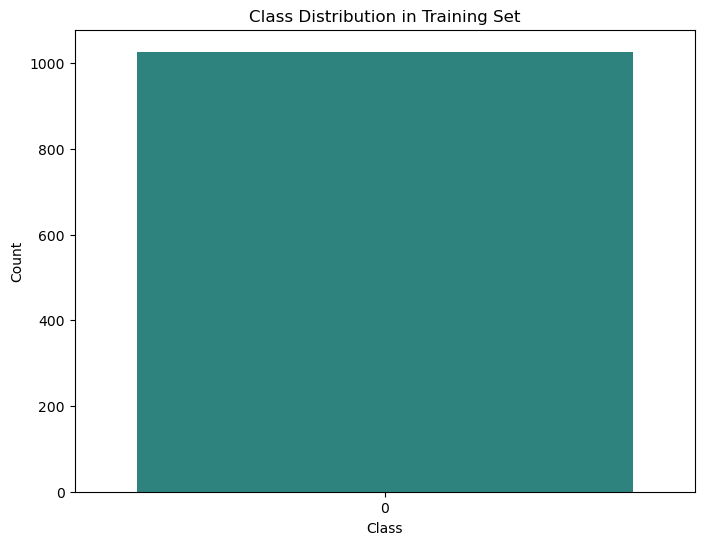

In [5]:
train_labels = np.array([label.numpy() for _, label in train_data])

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(train_labels, palette='viridis')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [6]:
# Extract features and labels from the dataset
X_train = np.array([image.numpy().reshape(-1) for image, _ in train_data])
y_train = np.array([label.numpy() for _, label in train_data])
X_test = np.array([image.numpy().reshape(-1) for image, _ in test_data])
y_test = np.array([label.numpy() for _, label in test_data])

In [7]:
# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predict on test set
y_pred = random_forest.predict(X_test_scaled)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7421875


In [11]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


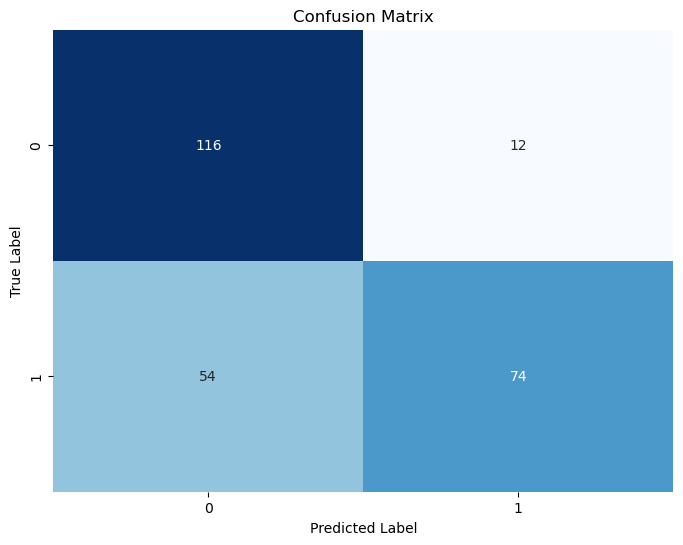

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()